In [1]:
import torch

In [2]:
from rbibm.utils.utils_data import query, query_main, remove_entry_by_id, query_rob_metric, get_model_by_idx, get_full_model_dataset
from rbibm.plots.multi_plots import multi_plot
from rbibm.plots.metric_plots import plot_by_num_simulations, plot_expected_coverage, plot_approximation_metric, plot_rob_tolerance_plot
from rbibm.plots.sweep_plots import plot_mulitobjective_paretto_front
from rbibm.plots.main_plots import plot_posterior, plot_adversarial_posterior, plot_posterior_predictive, plot_adversarial_posterior_predictive
from rbibm.plots.styles import use_style, get_style

import matplotlib.pyplot as plt 
import matplotlib as mpl

In [3]:
plt.style.use(get_style("pyloric"))

In [4]:
import torch
torch.manual_seed(0)

In [5]:
name = "benchmark"

In [21]:
query_main(name, model_name=["gaussian", "maf"])

,id,task,loss,defense,model_name,N_train,N_val,N_test,train_loss,validation_loss,test_loss,train_time,sim_time,seed
0,eeb42948-83df-4a32-b9ac-3fc1c5613965,lotka_volterra,NLLLoss,None,maf,1000,512,10000,-0.011445,2.020570,1.513539,1.297564,4.625429,0
1,a02cee1c-2b03-400e-89ee-f5cc5af5a1ec,sir,NLLLoss,None,maf,1000,512,10000,2.079695,2.889201,2.537300,0.929909,4.466141,0
2,9bcee419-a14d-4ef5-a54c-f9cf9dcc5fd5,gaussian_linear,NLLLoss,None,maf,1000,512,10000,-1.447192,2.296552,2.012200,1.338727,3.951780,0
5,20fe94ff-a37a-49a3-a649-d4d774db4a45,gaussian_linear,NLLLoss,None,maf,10000,512,10000,-2.764849,-2.273045,-2.215528,7.433989,3.795607,0
10,78eaf0ff-b19f-478e-b63e-10190d603894,spatial_sir,NLLLoss,None,maf,1000,512,10000,-0.381398,1.147486,0.773637,4.642453,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,6daf9e23-9db0-4afd-b153-12681b8a05d9,vae_task,NLLLoss,L2PGDrKLTrades,maf,100000,512,10000,NaN,NaN,0.407096,2003.013018,NaN,0
380,ca835436-2d4d-44cf-a5ae-efc93a8f5419,vae_task,NLLLoss,L2PGDrKLTrades,maf,100000,512,10000,-2.158096,-1.030017,-2.809936,2096.557327,NaN,0
381,1803d717-f66d-4140-a7a5-bf9f4fcfcccb,hudgkin_huxley,NLLLoss,L2PGDrKLTrades,maf,100000,512,10000,NaN,NaN,13.745934,2823.070470,NaN,0
383,229eeee2-8b32-4314-ae6c-78fb48379967,hudgkin_huxley,NLLLoss,L2PGDrKLTrades,maf,100000,512,10000,NaN,NaN,14.140416,2206.325850,NaN,0


In [6]:
color_map_eps = {0.: "#252525", 0.1: "#feb24c", 0.2:"#fd8d3c", 0.3: "#fc4e2a", 0.5:"#e31a1c", 1.: "#bd0026", 2.:"#800026" }
color_map_N_train = {1000.: "#78c679", 10000.: "#238443", 100000.: "#004529"}
color_map_attack = {"L2PGDAttack": "#023858", "L2UniformNoiseAttack": "#a6bddb"}

In [7]:
task = ["gaussian_linear", "sir", "lotka_volterra", "hudgkin_huxley", "vae_task", "spatial_sir"]

In [8]:
figsize_col=2.
figsize_row_expected_cov = 2.
figsize_row_rob = 1.8

In [9]:
import matplotlib as mpl

{'model_name': 'maf', 'defense': 'None', 'task': 'gaussian_linear', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'with_grid': False, 'attack': 'L2PGDAttack'}
{'model_name': 'maf', 'defense': 'None', 'task': 'lotka_volterra', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'with_grid': False, 'attack': 'L2PGDAttack'}
{'model_name': 'maf', 'defense': 'None', 'task': 'vae_task', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'with_grid': False, 'attack': 'L2PGDAttack'}
{'model_name': 'maf', 'defense': 'None', 'task': 'hudgkin_huxley', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'with_grid': False, 'attack': 'L2PGDAttack'}
{'model_name': 'maf', 'defense': 'None', 'task': 'sir', 'with

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


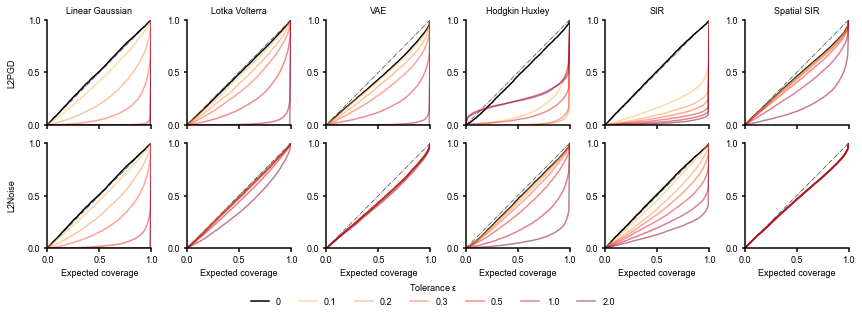

{'model_name': 'nsf', 'defense': 'None', 'task': 'gaussian_linear', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'with_grid': False, 'attack': 'L2PGDAttack'}
{'model_name': 'nsf', 'defense': 'None', 'task': 'lotka_volterra', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'with_grid': False, 'attack': 'L2PGDAttack'}
{'model_name': 'nsf', 'defense': 'None', 'task': 'vae_task', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'with_grid': False, 'attack': 'L2PGDAttack'}
{'model_name': 'nsf', 'defense': 'None', 'task': 'hudgkin_huxley', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'with_grid': False, 'attack': 'L2PGDAttack'}
{'model_name': 'nsf', 'defense': 'None', 'task': 'sir', 'with

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


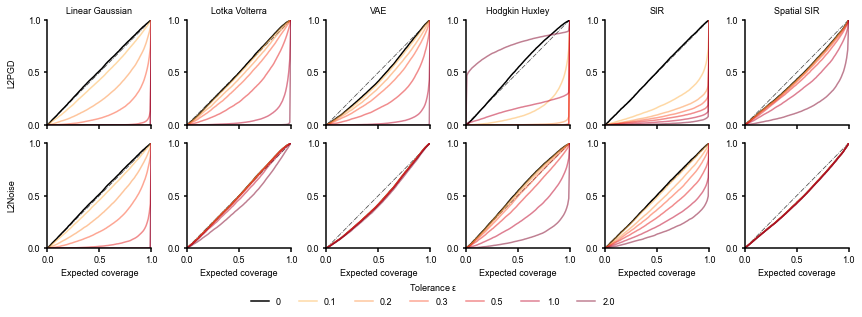

In [10]:

for n in ["maf", "nsf"]:
    with use_style("pyloric"):
        fig, axes = multi_plot(name, "task", "attack", plot_expected_coverage, model_name=n, defense="None",task=task, figsize_per_col=figsize_col, color_map=color_map_eps, figsize_per_row=figsize_row_expected_cov,
                                with_eps=True, hue="eps", N_train=100000, verbose=False, loss="NLLLoss",  metric_rob="ReverseKLRobMetric",with_grid=False)
        legend = fig.legends[0].set_title("Tolerance $\\epsilon$")
        axes[0,0].minorticks_off()
        plt.show()
        fig.savefig(f"expected_coverages_rKL_per_attack_{n}.svg")


{'model_name': 'maf', 'defense': 'None', 'task': 'gaussian_linear', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'with_grid': False, 'attack': 'L2PGDAttack'}
{'model_name': 'maf', 'defense': 'None', 'task': 'lotka_volterra', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'with_grid': False, 'attack': 'L2PGDAttack'}
{'model_name': 'maf', 'defense': 'None', 'task': 'vae_task', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'with_grid': False, 'attack': 'L2PGDAttack'}
{'model_name': 'maf', 'defense': 'None', 'task': 'hudgkin_huxley', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'with_grid': False, 'attack': 'L2PGDAttack'}
{'model_name': 'maf', 'defense': 'None', 'task': 'sir', 'with

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


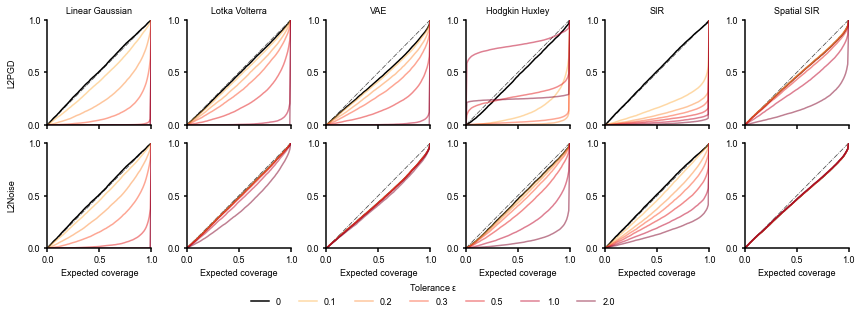

{'model_name': 'nsf', 'defense': 'None', 'task': 'gaussian_linear', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'with_grid': False, 'attack': 'L2PGDAttack'}
{'model_name': 'nsf', 'defense': 'None', 'task': 'lotka_volterra', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'with_grid': False, 'attack': 'L2PGDAttack'}
{'model_name': 'nsf', 'defense': 'None', 'task': 'vae_task', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'with_grid': False, 'attack': 'L2PGDAttack'}
{'model_name': 'nsf', 'defense': 'None', 'task': 'hudgkin_huxley', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ForwardKLRobMetric', 'with_grid': False, 'attack': 'L2PGDAttack'}
{'model_name': 'nsf', 'defense': 'None', 'task': 'sir', 'with

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


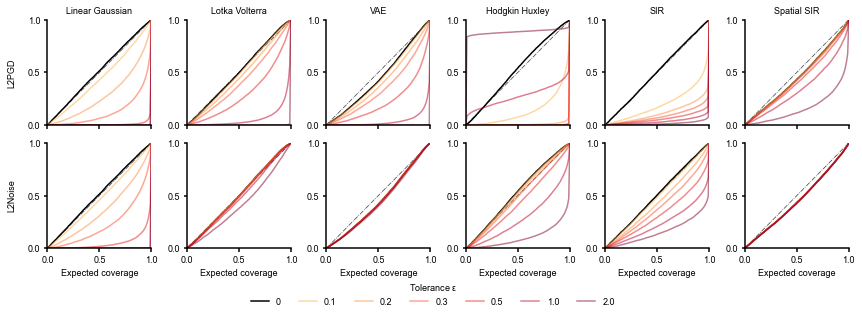

In [11]:

for n in ["maf", "nsf"]:
    with use_style("pyloric"):
        fig, axes = multi_plot(name, "task", "attack", plot_expected_coverage, model_name=n, defense="None",task=task, figsize_per_col=figsize_col, color_map=color_map_eps, figsize_per_row=figsize_row_expected_cov,
                                with_eps=True, hue="eps", N_train=100000, verbose=False, loss="NLLLoss",  metric_rob="ForwardKLRobMetric",with_grid=False)
        legend = fig.legends[0].set_title("Tolerance $\\epsilon$")
        fig.savefig(f"expected_coverages_fKL_per_attack_{n}.svg")
        plt.show()


{'model_name': 'maf', 'defense': 'None', 'task': 'gaussian_linear', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'with_grid': False, 'attack': 'L2PGDAttack'}
{'model_name': 'maf', 'defense': 'None', 'task': 'lotka_volterra', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'with_grid': False, 'attack': 'L2PGDAttack'}
{'model_name': 'maf', 'defense': 'None', 'task': 'vae_task', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'with_grid': False, 'attack': 'L2PGDAttack'}
{'model_name': 'maf', 'defense': 'None', 'task': 'hudgkin_huxley', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'with_grid': False, 'attack': 'L2PGDAttack'}
{'model_name': 'maf', 'defense': 'None', 'task': 'sir', 'with

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


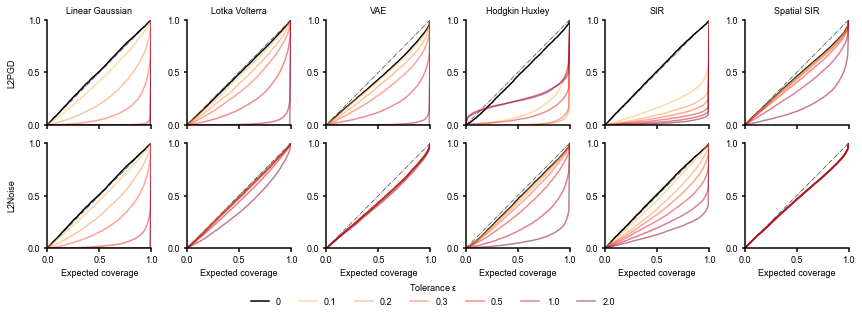

{'model_name': 'nsf', 'defense': 'None', 'task': 'gaussian_linear', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'with_grid': False, 'attack': 'L2PGDAttack'}
{'model_name': 'nsf', 'defense': 'None', 'task': 'lotka_volterra', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'with_grid': False, 'attack': 'L2PGDAttack'}
{'model_name': 'nsf', 'defense': 'None', 'task': 'vae_task', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'with_grid': False, 'attack': 'L2PGDAttack'}
{'model_name': 'nsf', 'defense': 'None', 'task': 'hudgkin_huxley', 'with_eps': True, 'hue': 'eps', 'N_train': 100000, 'verbose': False, 'loss': 'NLLLoss', 'metric_rob': 'ReverseKLRobMetric', 'with_grid': False, 'attack': 'L2PGDAttack'}
{'model_name': 'nsf', 'defense': 'None', 'task': 'sir', 'with

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


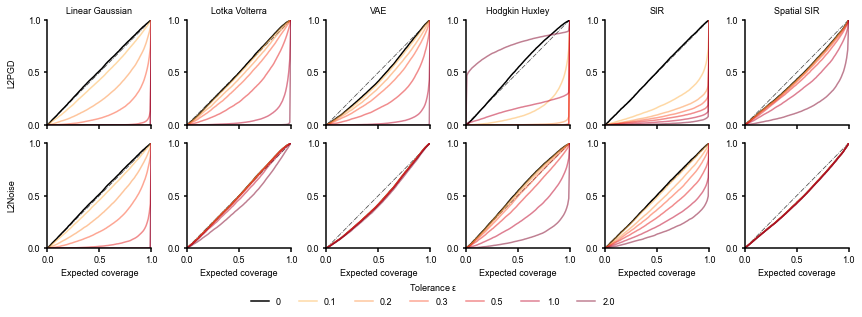

In [12]:

for n in ["maf", "nsf"]:
    with use_style("pyloric"):
        fig, axes = multi_plot(name, "task", "attack", plot_expected_coverage, model_name=n, defense="None",task=task, figsize_per_col=figsize_col, color_map=color_map_eps, figsize_per_row=figsize_row_expected_cov,
                                with_eps=True, hue="eps", N_train=100000, verbose=False, loss="NLLLoss",  metric_rob="ReverseKLRobMetric",with_grid=False)
        legend = fig.legends[0].set_title("Tolerance $\\epsilon$")
        axes[0,0].minorticks_off()
        plt.show()
        fig.savefig(f"expected_coverages_rKL_per_attack_{n}.svg")


{'figsize_col': 2.0, 'figsize_row': 1.8, 'model_name': 'maf', 'task': 'gaussian_linear', 'verbose': False, 'hue': 'N_train', 'defense': 'None', 'legend': False, 'attack': 'L2PGDAttack', 'metric_rob': 'ReverseKLRobMetric'}
{'figsize_col': 2.0, 'figsize_row': 1.8, 'model_name': 'maf', 'task': 'lotka_volterra', 'verbose': False, 'hue': 'N_train', 'defense': 'None', 'legend': False, 'attack': 'L2PGDAttack', 'metric_rob': 'ReverseKLRobMetric'}
{'figsize_col': 2.0, 'figsize_row': 1.8, 'model_name': 'maf', 'task': 'vae_task', 'verbose': False, 'hue': 'N_train', 'defense': 'None', 'legend': False, 'attack': 'L2PGDAttack', 'metric_rob': 'ReverseKLRobMetric'}
{'figsize_col': 2.0, 'figsize_row': 1.8, 'model_name': 'maf', 'task': 'hudgkin_huxley', 'verbose': False, 'hue': 'N_train', 'defense': 'None', 'legend': False, 'attack': 'L2PGDAttack', 'metric_rob': 'ReverseKLRobMetric'}
{'figsize_col': 2.0, 'figsize_row': 1.8, 'model_name': 'maf', 'task': 'sir', 'verbose': False, 'hue': 'N_train', 'defense

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


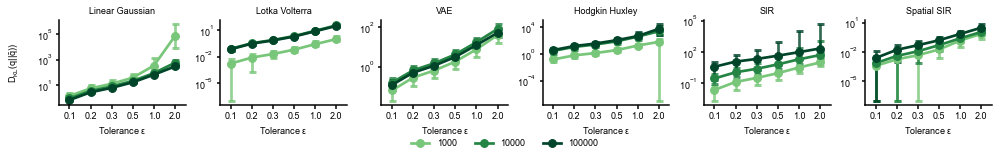

In [13]:
with use_style("pyloric"):
    fig, axes = multi_plot(name, "task", "model_name", plot_rob_tolerance_plot, figsize_col=figsize_col, figsize_row=figsize_row_rob, model_name="maf",
                            task=task, verbose=False, hue="N_train", defense="None", legend=False,attack="L2PGDAttack", metric_rob="ReverseKLRobMetric", color_map=color_map_N_train)
    axes[0,0].minorticks_off()
    axes[0,0].set_ylabel("$D_{KL}(q||\\tilde{q}))$")
    plt.show()
    fig.savefig("main_rob_tol_rKL_maf.svg")

{'model_name': 'maf', 'task': 'gaussian_linear', 'verbose': False, 'hue': 'N_train', 'defense': 'None', 'legend': False, 'attack': 'L2PGDAttack', 'metric_rob': 'ForwardKLRobMetric'}
{'model_name': 'maf', 'task': 'lotka_volterra', 'verbose': False, 'hue': 'N_train', 'defense': 'None', 'legend': False, 'attack': 'L2PGDAttack', 'metric_rob': 'ForwardKLRobMetric'}
{'model_name': 'maf', 'task': 'vae_task', 'verbose': False, 'hue': 'N_train', 'defense': 'None', 'legend': False, 'attack': 'L2PGDAttack', 'metric_rob': 'ForwardKLRobMetric'}
{'model_name': 'maf', 'task': 'hudgkin_huxley', 'verbose': False, 'hue': 'N_train', 'defense': 'None', 'legend': False, 'attack': 'L2PGDAttack', 'metric_rob': 'ForwardKLRobMetric'}
{'model_name': 'maf', 'task': 'sir', 'verbose': False, 'hue': 'N_train', 'defense': 'None', 'legend': False, 'attack': 'L2PGDAttack', 'metric_rob': 'ForwardKLRobMetric'}
{'model_name': 'maf', 'task': 'spatial_sir', 'verbose': False, 'hue': 'N_train', 'defense': 'None', 'legend': F

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


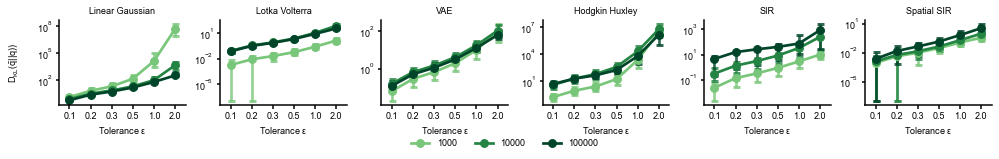

In [14]:
with use_style("pyloric"):
    fig, axes = multi_plot(name, "task", "model_name", plot_rob_tolerance_plot, model_name="maf", task=task, verbose=False, hue="N_train", defense="None", legend=False,attack="L2PGDAttack", metric_rob="ForwardKLRobMetric", color_map=color_map_N_train)
    axes[0][0].minorticks_off()
    axes[0,0].set_ylabel("$D_{KL}(\\tilde{q}||q))$")
    plt.show()
    fig.savefig("main_rob_tol_fKL_maf.svg", transparent=True)

{'model_name': 'maf', 'task': 'gaussian_linear', 'verbose': False, 'hue': 'attack', 'N_train': 100000, 'defense': 'None', 'legend': False, 'metric_rob': 'ReverseKLRobMetric'}
{'model_name': 'maf', 'task': 'lotka_volterra', 'verbose': False, 'hue': 'attack', 'N_train': 100000, 'defense': 'None', 'legend': False, 'metric_rob': 'ReverseKLRobMetric'}
{'model_name': 'maf', 'task': 'vae_task', 'verbose': False, 'hue': 'attack', 'N_train': 100000, 'defense': 'None', 'legend': False, 'metric_rob': 'ReverseKLRobMetric'}
{'model_name': 'maf', 'task': 'hudgkin_huxley', 'verbose': False, 'hue': 'attack', 'N_train': 100000, 'defense': 'None', 'legend': False, 'metric_rob': 'ReverseKLRobMetric'}
{'model_name': 'maf', 'task': 'sir', 'verbose': False, 'hue': 'attack', 'N_train': 100000, 'defense': 'None', 'legend': False, 'metric_rob': 'ReverseKLRobMetric'}
{'model_name': 'maf', 'task': 'spatial_sir', 'verbose': False, 'hue': 'attack', 'N_train': 100000, 'defense': 'None', 'legend': False, 'metric_rob

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


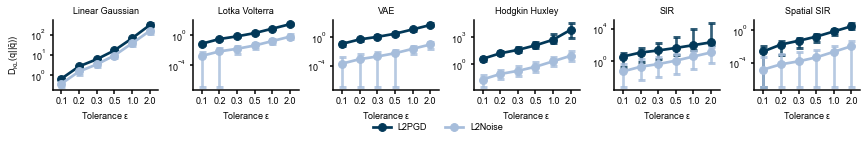

In [15]:
with use_style("pyloric"):
    fig, axes = multi_plot(name, "task", "model_name", plot_rob_tolerance_plot, 
                           model_name="maf",task=task, 
                           figsize_per_col=figsize_col, figsize_per_row=figsize_row_rob, verbose=False,hue="attack", N_train=100000, defense="None", legend=False, metric_rob="ReverseKLRobMetric", color_map=color_map_attack)
    axes[0][0].minorticks_off()
    axes[0,0].set_ylabel("$D_{KL}(q||\\tilde{q}))$")
    plt.show()
    fig.savefig("main_rob_tol_rKL_maf_attacks.svg", transparent=True)

{'model_name': 'maf', 'task': 'gaussian_linear', 'verbose': False, 'hue': 'attack', 'N_train': 100000, 'defense': 'None', 'legend': False, 'metric_rob': 'ForwardKLRobMetric'}
{'model_name': 'maf', 'task': 'lotka_volterra', 'verbose': False, 'hue': 'attack', 'N_train': 100000, 'defense': 'None', 'legend': False, 'metric_rob': 'ForwardKLRobMetric'}
{'model_name': 'maf', 'task': 'vae_task', 'verbose': False, 'hue': 'attack', 'N_train': 100000, 'defense': 'None', 'legend': False, 'metric_rob': 'ForwardKLRobMetric'}
{'model_name': 'maf', 'task': 'hudgkin_huxley', 'verbose': False, 'hue': 'attack', 'N_train': 100000, 'defense': 'None', 'legend': False, 'metric_rob': 'ForwardKLRobMetric'}
{'model_name': 'maf', 'task': 'sir', 'verbose': False, 'hue': 'attack', 'N_train': 100000, 'defense': 'None', 'legend': False, 'metric_rob': 'ForwardKLRobMetric'}
{'model_name': 'maf', 'task': 'spatial_sir', 'verbose': False, 'hue': 'attack', 'N_train': 100000, 'defense': 'None', 'legend': False, 'metric_rob

/mnt/qb/home/macke/mgloeckler90/robustness_ai/src/rbibm/rbibm/plots/multi_plots.py:267: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


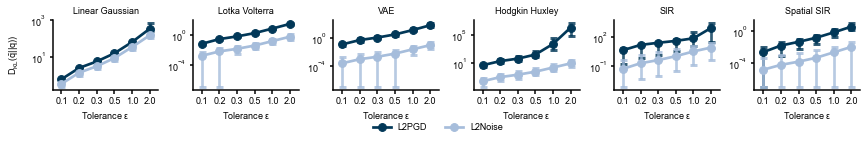

In [16]:
with use_style("pyloric"):
    fig, axes = multi_plot(name, "task", "model_name", plot_rob_tolerance_plot,figsize_per_col=figsize_col, figsize_per_row=figsize_row_rob, model_name="maf",task=task, verbose=False,hue="attack", N_train=100000, defense="None", legend=False, metric_rob="ForwardKLRobMetric", color_map=color_map_attack)
    axes[0][0].minorticks_off()
    axes[0,0].set_ylabel("$D_{KL}(\\tilde{q}||q))$")
    plt.show()
fig.savefig("main_rob_tol_fKL_maf_attacks.svg", transparent=True)